# Assignment

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

# My work:

**I found a dataset from https://www.kaggle.com/datasets/lfarhat/brasil-students-scholarship-prouni-20052019 that shows all the students that received scholarship "Prouni" from 2005 to 2019.
I noticed that there was a column of each student origin county, so i searched for a dataset of brazilian countys dataset at http://blog.mds.gov.br/redesuas/lista-de-municipios-brasileiros/ to cros the informations.
With this I could add to the dataset the informations of County Size and if it is a Capital or not.**

**In this project I would like to answer the following questions:**
- Has the number of scholarships grown over the years or not?
- There are more men or more women winning scholarships?
- How is the age distribution of students?
- How is the regional distribution of students?
- Are there more students from big cities or also from smaller cities?

In [2]:
import pandas as pd
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from geopy.geocoders import Nominatim

In [3]:
# Reading a CSV file and loading it into a DataFrame
prouni = pd.read_csv('/kaggle/input/brasil-students-scholarship-prouni-20052019/prouni_2005_2019.csv')[["ANO_CONCESSAO_BOLSA",
                                                     "NOME_IES_BOLSA",
                                                     "TIPO_BOLSA",
                                                     "MODALIDADE_ENSINO_BOLSA",
                                                     "NOME_CURSO_BOLSA",
                                                     "NOME_TURNO_CURSO_BOLSA",
                                                     "SEXO_BENEFICIARIO_BOLSA",
                                                     "RACA_BENEFICIARIO_BOLSA",
                                                     "DT_NASCIMENTO_BENEFICIARIO",
                                                     "BENEFICIARIO_DEFICIENTE_FISICO",
                                                     "REGIAO_BENEFICIARIO_BOLSA",
                                                     "SIGLA_UF_BENEFICIARIO_BOLSA",
                                                     "MUNICIPIO_BENEFICIARIO_BOLSA",
                                                     "idade"]]

brasil_conties = pd.read_csv("/kaggle/input/brasil-counties/Brasil_counties.csv", sep=';')[["UF","Município","Região","Porte","Capital"]]

In [4]:
# Translating column names and values
prouni = prouni.rename(columns = {"ANO_CONCESSAO_BOLSA" : "Year of Scholarship Grant",
                         "NOME_IES_BOLSA":"Scholarship Institution Name",
                         "TIPO_BOLSA":"Scholarship Type",
                         "MODALIDADE_ENSINO_BOLSA":"Scholarship Education Modality",
                         "NOME_CURSO_BOLSA":"Course Name for Scholarship",
                         "NOME_TURNO_CURSO_BOLSA":"Course Period",
                         "SEXO_BENEFICIARIO_BOLSA":"Gender of Scholarship Beneficiary",
                         "RACA_BENEFICIARIO_BOLSA":"Ethnicity of Scholarship Beneficiary",
                         "DT_NASCIMENTO_BENEFICIARIO":"Beneficiary Date of Birth",
                         "BENEFICIARIO_DEFICIENTE_FISICO":"Physically Disabled Scholarship Beneficiary",
                         "REGIAO_BENEFICIARIO_BOLSA":"Region of Scholarship Beneficiary",
                         "SIGLA_UF_BENEFICIARIO_BOLSA": "State Abbreviation of Scholarship Beneficiary",
                         "MUNICIPIO_BENEFICIARIO_BOLSA":"County of Scholarship Beneficiary",
                         "idade":"Age"})

translation_dict = {'BOLSA PARCIAL 50%': '50% Partial Scholarship',
                    'BOLSA INTEGRAL': 'Full Scholarship',
                    'BOLSA COMPLEMENTAR 25%': '25% Complementary Scholarship',
                    'PRESENCIAL': 'On-site',
                    'EAD': 'Distance Learning',
                    'Integral': 'Full-time',
                    'Noturno': 'Night',
                    'Matutino': 'Morning',
                    'Vespertino': 'Afternoon',
                    'A Distancia': 'Distance learning',
                    'Branca': 'White', 'Parda': 'Mixed',
                    'Amarela': 'Asian',
                    'Nao Informada': 'Not Informed',
                    'Preta': 'Black',
                    'Indigena': 'Indigenous',
                    'nao':'No',
                    'sim':'Yes',
                    'SUL':'South',
                    'SUDESTE':'Southeast',
                    'CENTRO-OESTE':'Midwest',
                    'NORTE':'North',
                    'NORDESTE':'Northeast'}

prouni['Scholarship Type'] = prouni['Scholarship Type'].replace(translation_dict)
prouni['Scholarship Education Modality'] = prouni['Scholarship Education Modality'].replace(translation_dict)
prouni['Course Period'] = prouni['Course Period'].replace(translation_dict)
prouni['Ethnicity of Scholarship Beneficiary'] = prouni['Ethnicity of Scholarship Beneficiary'].replace(translation_dict)
prouni['Physically Disabled Scholarship Beneficiary'] = prouni['Physically Disabled Scholarship Beneficiary'].replace(translation_dict)
prouni['Region of Scholarship Beneficiary'] = prouni['Region of Scholarship Beneficiary'].replace(translation_dict)

prouni['Beneficiary Date of Birth'] = pd.to_datetime(prouni['Beneficiary Date of Birth'])
prouni['County of Scholarship Beneficiary'] = prouni['County of Scholarship Beneficiary'].str.title()

In [5]:
# Translating column names and values
brasil_conties = brasil_conties.rename(columns = {"UF" : "State",
                                                  "Município":"County",
                                                  "Região":"Region",
                                                  "Porte":"Size"})
translation_dict = {'Região Norte': 'North',
                    'Região Nordeste': 'Northeast',
                    'Região Sudeste': 'Southeast',
                    'Região Sul': 'South',
                    'Região Centro-Oeste': 'Midwest',
                    'Pequeno II': 'Small II',
                    'Médio': 'Medium',
                    'Pequeno I': 'Small I',
                    'Grande': 'Big',
                    'Metrópole': 'Metropolis',
                    'Capital': 'Yes',}

brasil_conties['Region'] = brasil_conties['Region'].replace(translation_dict)
brasil_conties['Size'] = brasil_conties['Size'].replace(translation_dict)
brasil_conties['Capital'] = brasil_conties['Capital'].replace(translation_dict)

brasil_conties['County'] = brasil_conties['County'].apply(unidecode.unidecode)
brasil_conties['County'] = brasil_conties['County'].str.title()

In [6]:
# Combines the dataframes based on the column of Counties
merged_df = prouni.merge(brasil_conties, left_on='County of Scholarship Beneficiary', right_on='County')
merged_df = merged_df.drop(columns=['State', 'County', 'Region'])

In [7]:
merged_df

,Year of Scholarship Grant,Scholarship Institution Name,Scholarship Type,Scholarship Education Modality,Course Name for Scholarship,Course Period,Gender of Scholarship Beneficiary,Ethnicity of Scholarship Beneficiary,Beneficiary Date of Birth,Physically Disabled Scholarship Beneficiary,Region of Scholarship Beneficiary,State Abbreviation of Scholarship Beneficiary,County of Scholarship Beneficiary,Age,Size,Capital
0,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,50% Partial Scholarship,On-site,Enfermagem,Full-time,F,White,1987-02-17,No,South,RS,Santo Angelo,34.0,Medium,NaN
1,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,50% Partial Scholarship,On-site,Pedagogia,Night,F,Not Informed,1980-08-03,No,South,RS,Santo Angelo,41.0,Medium,NaN
2,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,50% Partial Scholarship,On-site,Pedagogia,Night,F,Not Informed,1967-12-25,No,South,RS,Santo Angelo,53.0,Medium,NaN
3,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,50% Partial Scholarship,On-site,Pedagogia,Night,F,Not Informed,1977-05-15,No,South,RS,Santo Angelo,44.0,Medium,NaN
4,2005,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,50% Partial Scholarship,On-site,Pedagogia,Night,F,Not Informed,1986-02-22,No,South,RS,Santo Angelo,35.0,Medium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952253,2018,FACULDADE ESTACIO DE TERESINA,Full Scholarship,On-site,Fisioterapia,Morning,F,Mixed,1995-07-31,No,Northeast,PI,Socorro Do Piaui,26.0,Small I,NaN
2952254,2018,INSTITUTO DE EDUCAAAO SUPERIOR RAIMUNDO SA,Full Scholarship,On-site,ServiAo Social,Morning,F,Mixed,1996-07-05,No,Northeast,PI,Vera Mendes,25.0,Small I,NaN
2952255,2019,FACULDADE DE CIASNCIAS HUMANAS DE OLINDA,50% Partial Scholarship,On-site,CiAancias ContAbeis,Night,M,Mixed,2000-04-13,No,Northeast,PI,Canavieira,21.0,Small I,NaN
2952256,2019,CENTRO UNIVERSITARIO MAURACIO DE NASSAU DE CAM...,Full Scholarship,On-site,Engenharia Civil,Morning,M,Mixed,1998-05-17,No,Northeast,PB,Parari,23.0,Small I,NaN


## Now that I've cleaned, translated, and merged the datasets, I'll start answering the questions through data visualization.

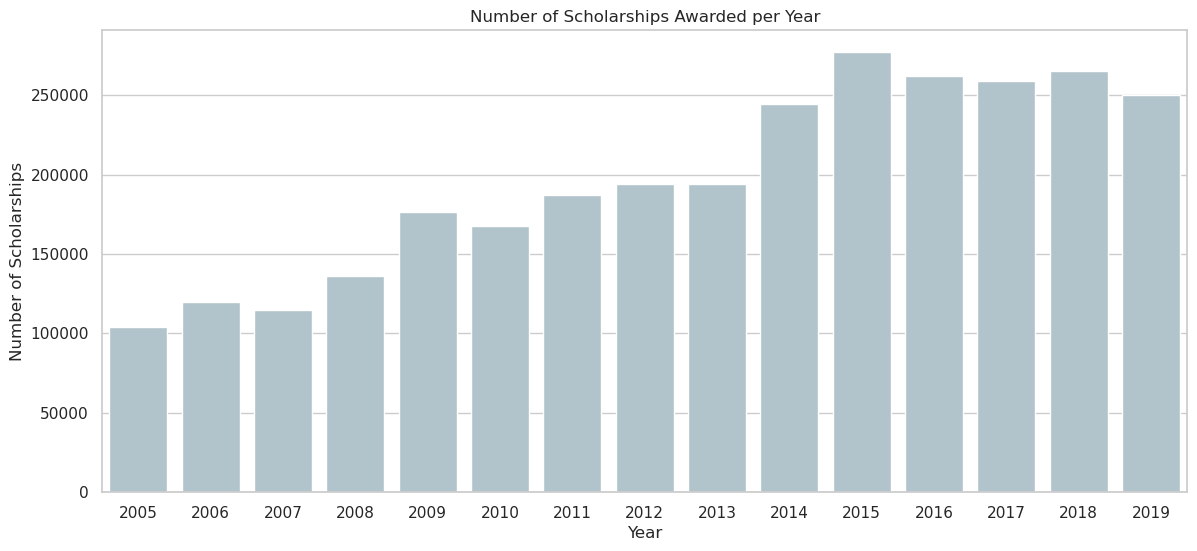

In [8]:
# Plotting a graph of the number of Scholarships per year
sns.set(style="whitegrid")
cor = "#AEC6CF"
sns.set_palette([cor])

count_by_year = merged_df["Year of Scholarship Grant"].value_counts()

plt.figure(figsize=(14, 6))
sns.barplot(x=count_by_year.index, y=count_by_year.values, palette=[cor])

plt.title("Number of Scholarships Awarded per Year")
plt.xlabel("Year") 
plt.ylabel("Number of Scholarships") 
plt.show() 

## With this barplot we can see that the number of scholarships increased until 2015 and then remained constant with a small reduction until 2019

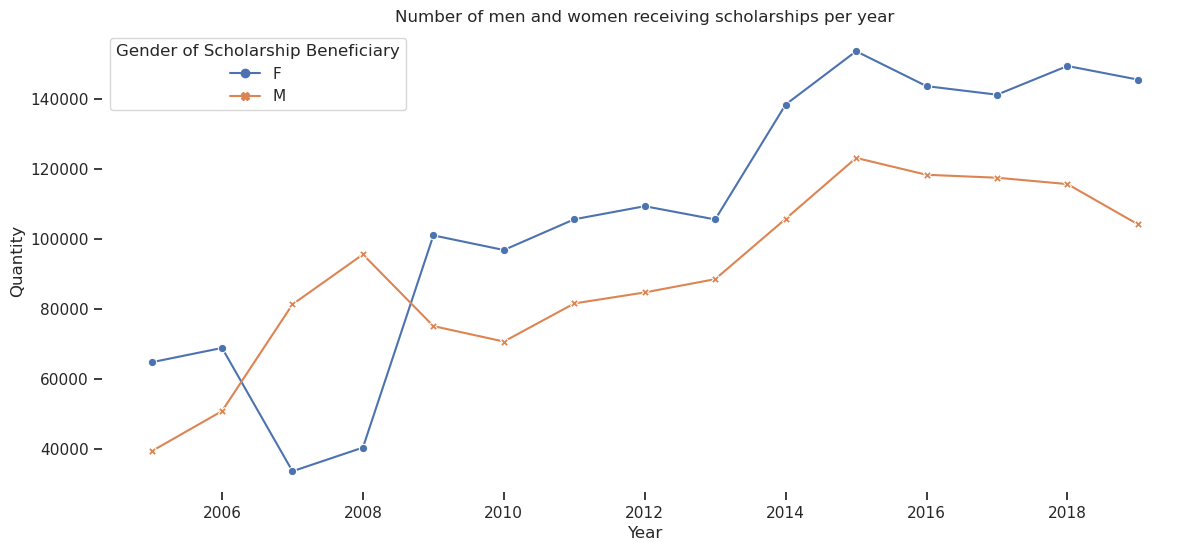

In [9]:
# Plotting Number of men and women receiving grants per year
grouped_df = merged_df.groupby("Year of Scholarship Grant")["Gender of Scholarship Beneficiary"].value_counts().unstack()

sns.set_palette("Set2")  
sns.set(style="ticks")  
plt.figure(figsize=(14, 6)) 
sns.lineplot(data=grouped_df, markers=True, dashes=False)

plt.xlabel("Year")
plt.ylabel("Quantity")
plt.title("Number of men and women receiving scholarships per year")

sns.despine(bottom=True, left=True)

plt.show()

## Here we can see that the number of men and women is very similar and overall there are more women than men receiving scholarships

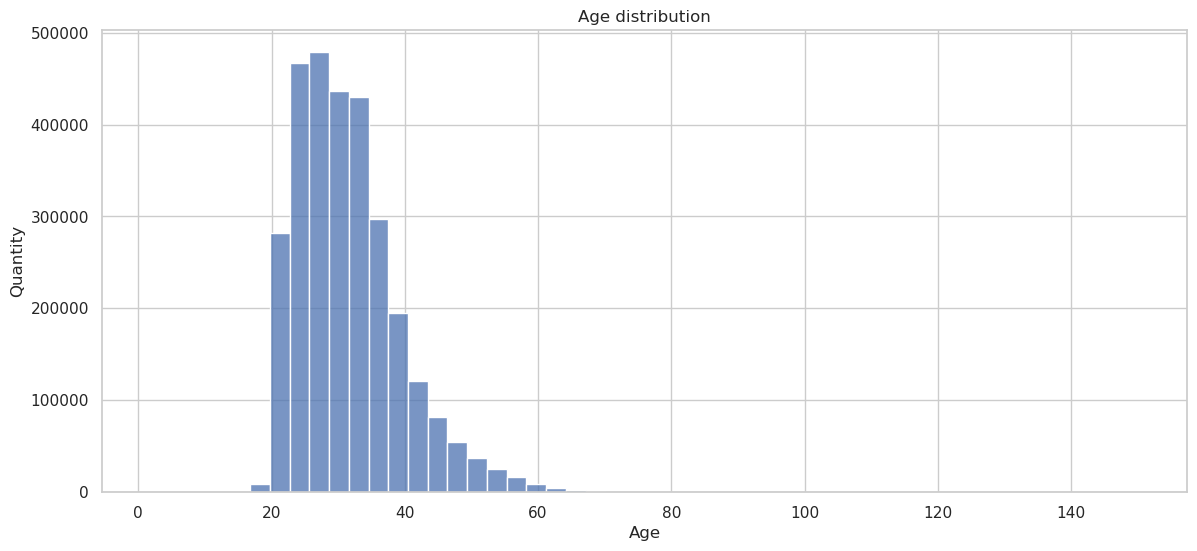

In [10]:
#Plotting age distribution histogram
sns.set_style("whitegrid") 

plt.figure(figsize=(14, 6))
sns.histplot(data=merged_df, x="Age", bins=50)

plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Quantity")

plt.show()

## In this histogram I see that the most common age is between 20 and 30 years old and that there is also a significant number of students over 40 years old receiving scholarships

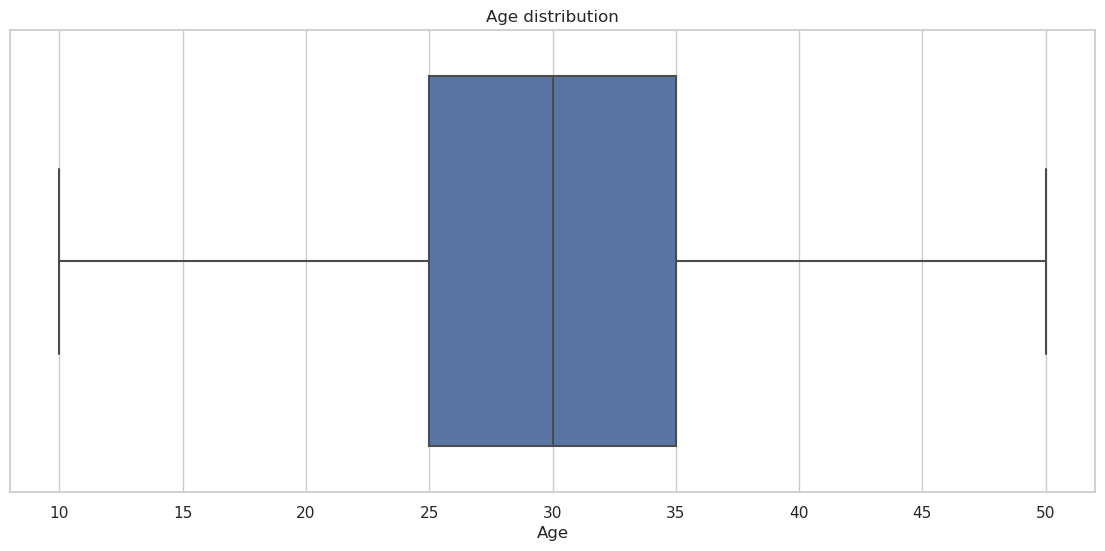

In [11]:
# Age distribution boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(x=merged_df["Age"], showfliers=False)

plt.title("Age distribution")

plt.show()

## Just a boxplot to visualize the sample quarters

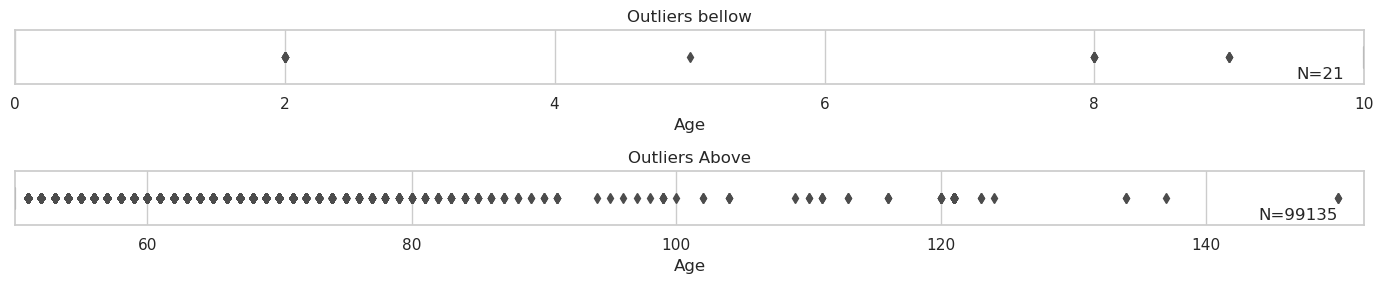

In [12]:
# Calculate the mean and standard deviation of the 'Age' column
q25_age = np.percentile(merged_df['Age'], 25)
q75_age = np.percentile(merged_df['Age'], 75)
IQR_age = q75_age - q25_age

# Identify the values below and above the mean plus 1.5 standard deviations
lower_bound = q25_age - 1.5 * IQR_age
upper_bound = q75_age + 1.5 * IQR_age

# Create subsets of the original DataFrame with values below and above the mean
outliers_below = merged_df[merged_df['Age'] < lower_bound]
outliers_above = merged_df[merged_df['Age'] > upper_bound]

# Calculate the amount of points in each subset
lower_subset_count = len(outliers_below)
upper_subset_count = len(outliers_above)

plt.figure(figsize=(14, 3))

# Subplot 1
plt.subplot(2, 1, 1)
sns.boxplot(data=merged_df[["Age"]], x='Age', showfliers=True, orient='h')
plt.xlim(0, lower_bound)
plt.title('Outliers bellow')
plt.text(lower_bound-0.5, 0.4, f"N={len(merged_df[merged_df['Age']<=lower_bound])}")

# Subplot 2
plt.subplot(2, 1, 2)
sns.boxplot(data=merged_df[["Age"]], x='Age', showfliers=True, orient='h')
plt.xlim(upper_bound, int(merged_df["Age"].max())+2)
plt.title('Outliers Above')
plt.text(int(merged_df["Age"].max())-6, 0.4, f"N={len(merged_df[merged_df['Age']>=upper_bound])}")

plt.tight_layout()
plt.show()

## Here I wanted to see the outlier points below and above the others.
## I also printed in the lower right corner the number of dots being represented

In [20]:
merged_df = merged_df[(merged_df['Age'] >= lower_bound) & (merged_df['Age'] <= upper_bound)]

In [21]:
# Group the data by municipality and count the number of scholarships in each group
bolsas_por_municipio = merged_df.groupby('County of Scholarship Beneficiary').size().reset_index(name='num_bolsas')
bolsas_por_municipio = bolsas_por_municipio.sort_values(['num_bolsas'],ascending = False)[:1000]

geolocator = Nominatim(user_agent='prouni-brasil')

def get_location(city):
    location = geolocator.geocode(city + ', Brazil')
    return [location.latitude, location.longitude]
bolsas_por_municipio['coordinates'] = bolsas_por_municipio['County of Scholarship Beneficiary'].apply(lambda x: get_location(x))

In [22]:
m = folium.Map(location=[-15.788497,-47.879873], zoom_start=4)

for _, row in bolsas_por_municipio.iterrows():
    try:
        folium.CircleMarker(location=row['coordinates'], 
                            radius=row['num_bolsas']/12000, # tamanho proporcional ao número de bolsas
                            color='blue', color_opacity=0.2, fill=True, fill_color='blue', fill_opacity=0.8).add_to(m)
    except: continue

m

## This is a map plot where we can see the regional distribution of the students in the top 1000 Countys. (I had to limit this to be able to plot)
## We can see that a expressive number of students are from São Paulo but there is also a lot of people all over the country

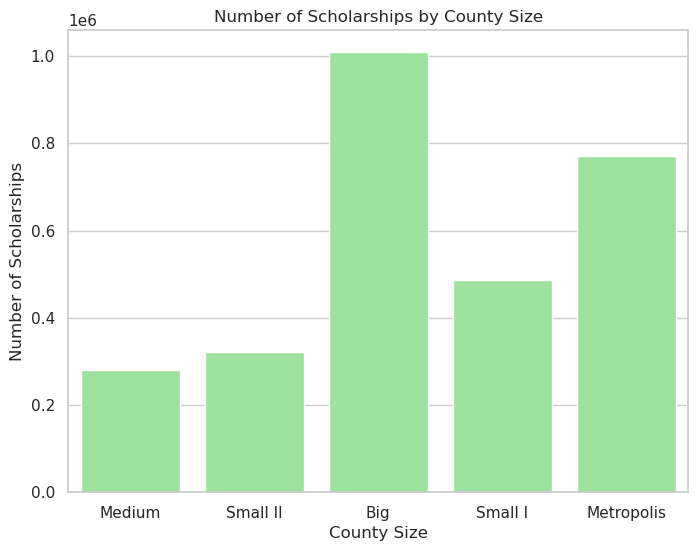

In [23]:
merged_df['Size'].astype(pd.CategoricalDtype(['Small I', 'Small II', 'Medium', 'Big', 'Metropolis'], ordered=True))

sns.set_style('whitegrid')

plt.figure(figsize=(8,6))
ax = sns.countplot(x='Size', data=merged_df, color='lightgreen')
ax.set_xlabel('County Size')
ax.set_ylabel('Number of Scholarships')
ax.set_title('Number of Scholarships by County Size')
plt.show()

## Finally, I plotted the number of students from different city sizes on this barchart.
## We can see that there is a good distribution and not all scholarships are delivered to citizens of big cities